![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)
# **$$\hspace{80mm}\textbf{Frequency and Contingency Tables}$$**

 Frequency table lists a set of values and how often each one appears. Frequency is the number of times a specific data value occurs in your dataset. These tables help you understand which data values are common and which are rare. These tables organize your data and are an effective way to present the results to others. Frequency tables are also known as frequency distributions because they allow you to understand the distribution of values in your dataset.

For example, if 18 students have pet dogs, dog ownership has a frequency of 18. A frequency table of pet ownership will list various types of pets and their frequencies, including dogs.

Frequency distribution tables are a great way to find the mode for datasets.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## 🔖 **$\color{blue}{\textbf{Lab Work 1:}}$ Create a Frequency Table step by step using statistics concepts and basic Python**
<details>
  <summary><b>Show the problem and data</b></summary>
Nineteen people were asked how many miles, to the nearest mile, they commute to work each day.  The data are as follows: 2, 5, 7, 3, 2, 10, 18, 15, 20, 7, 10, 18, 5, 12, 13, 12, 4, 5, 10.  Create a frequency table

</details>

In [ ]:
import pandas as pd
# dictionary with key and value pair
raw_data = {"data": [2, 5, 7, 3, 2, 10, 18, 15, 20, 7, 10, 18, 5, 12, 13, 12, 4, 5, 10]}

#### **Step 1. Create a data frame using the raw data**

In [ ]:
commute_miles = pd.DataFrame(raw_data)
commute_miles

,data
0,2
1,5
2,7
3,3
4,2
5,10
6,18
7,15
8,20
9,7


#### **Step 2. Create the FREQUENCY Column Using `pandas.crosstab`**

<details>
<summary><b>What is crosstab?</b></summary>

The [`padas.crosstab`](https://pandas.pydata.org/pandas-docs/version/0.15.1/generated/pandas.crosstab.html) function is used to compute a simple cross-tabulation of two (or more) factors. Essentially, it is a way to generate a table that shows the frequency with which certain groups of data appear together. The `crosstab` function is often used in statistics and data analysis to analyze the relationship between two or more variables.

Here's a basic overview of its functionality:

1. **Syntax**: The basic syntax of `pandas.crosstab` is:
   ```python
   pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', ...)
   ```

   - `index`: Array-like, values to group by in the rows.
   - `columns`: Array-like, values to group by in the columns.
   - `values`: Array-like, optional, array to aggregate according to the factors.
   - `aggfunc`: Function, optional, if provided, requires `values` to be specified as well. It applies the function to the values for aggregation.
   - `margins`: Boolean, default False, add row/column margins (subtotals).
   - `margins_name`: Name of the row/column that will contain the totals when `margins` is True.

2. **Use Cases**: `crosstab` is commonly used for:
   - Exploring data to understand the relationship between two categorical variables.
   - Summarizing the data to prepare it for further analysis or to present insights from the data.
   - Conducting contingency analysis in statistics.

3. **Example**:
   Suppose you have a DataFrame `df` with columns `'Gender'` and `'Handedness'`, you can use `crosstab` to understand the distribution as follows:

   ```python
   import pandas as pd

   # Sample DataFrame
   df = pd.DataFrame({
       'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
       'Handedness': ['Right-handed', 'Left-handed', 'Right-handed', 'Right-handed', 'Left-handed']
   })

   # Crosstab
   ctab = pd.crosstab(df['Gender'], df['Handedness'])
   print(ctab)
   ```

   This will produce a table that shows the count of males and females for each handedness category.

`pandas.crosstab` is a highly versatile function that can be customized in various ways to suit different requirements of data analysis, making it a valuable tool for understanding and presenting categorical data relationships.
</details>

##Syntax:
###`pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False)`


<details>
  <summary><b>Show Description of crosstab parameters</b></summary>
Let’s take a closer look at these parameters:

|Parameter	|Default Value	|Description|
|:--:|:--:|:--:|
|index	|	|Values to group by in rows
|columns|	|	Values to group by in columns
|values	|	|Array of values to aggregate
|rownames|	|	What to name rows (list)
|colnames	||	What to name columns (list)
|aggfunc	|count	|How to aggregate data
|margins	|False	|Add row/column totals
|margins_name	|“All”	|The name for row/column totals
|dropna	|True	|Do not include columns whose entries are all NaN
|normalize	|False	|Normalize by dividing all values by the sum of values.<br> Learn more in the section of normalizing.

</details>

In [ ]:
commute_frequency = pd.crosstab(index=commute_miles['data'], columns=["frequency"])
commute_frequency

col_0,frequency
data,
2,2
3,1
4,1
5,3
7,2
10,3
12,2
13,1
15,1


###🧚 **$\color{orange}{\textbf{Important Tip:}}$**  


**1.** We will create a new data frame to represent a frequency table derived from the raw data. To avoid confusion, ensure to assign a distinct name to this frequency table, differentiating it from the raw data's data frame.

**2.** It's important to use separate variable names for the raw data and the frequency table. If you accidentally use the same variable name for both, you will overwrite the raw data with the frequency table. Should this happen, you'll need to re-execute the code from Step 1 to restore the `data frame` back to its original state containing the **raw data**.

#### **Step 3. Generate the RELATIVE FREQUENCY COLUMN.**

In [ ]:
# find total frequency as the sum of the frequency column
total_frequency = commute_frequency.frequency.sum()
total_frequency

19

In [ ]:
from fractions import Fraction

# initialize a column
commute_frequency["relative_frequency"] = ""
# iterate through each element in the frequency column to compute a relative frequency
for idx in commute_frequency.index:
    commute_frequency["relative_frequency"][idx] = Fraction(commute_frequency["frequency"][idx], total_frequency)

<ipython-input-11-0fa21ccde0a0>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  commute_frequency["relative_frequency"][idx] = Fraction(commute_frequency["frequency"][idx], total_frequency)
<ipython-input-11-0fa21ccde0a0>:7: SettingWithCopy

In [ ]:
commute_frequency

col_0,frequency,relative_frequency
data,,
2,2,2/19
3,1,1/19
4,1,1/19
5,3,3/19
7,2,2/19
10,3,3/19
12,2,2/19
13,1,1/19
15,1,1/19


####**Step 4: Generate the CUMULATIVE RELATIVE FREQUENCY**

In [ ]:
commute_frequency["cumulative_relative_frequency"] = commute_frequency["relative_frequency"].cumsum()

In [ ]:
commute_frequency

col_0,frequency,relative_frequency,cumulative_relative_frequency
data,,,
2,2,2/19,2/19
3,1,1/19,3/19
4,1,1/19,4/19
5,3,3/19,7/19
7,2,2/19,9/19
10,3,3/19,12/19
12,2,2/19,14/19
13,1,1/19,15/19
15,1,1/19,16/19


###🧚 **$\color{orange}{\textbf{Important Tip:}}$**  
#### If you use the same variable name for both the raw and frequency table, you need to rerun your code from the Step 1 if you want to redefine `data frame` with the **raw data**.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## 🔖 **$\color{blue}{\textbf{Lab Work 2:}}$ Creating a Frequency table with raw data using sidetable:**

`sidetable` is a Python library that extends the functionality of Pandas DataFrames by providing a simple and convenient way to create summary tables. It's essentially a helper tool for Pandas, making it easier to generate frequency tables, cross-tabulations, and other descriptive statistics from a DataFrame.

The `sidetable` library streamlines the process of exploring and understanding the distribution of data within a DataFrame. It's particularly useful in data analysis for quickly summarizing data, identifying missing values, and understanding the distribution of variables.




<details>
<summary><b>Key features of <code>sidetable</code> include:</b></summary>


1. **Frequency Counts and Proportions**: It can quickly generate frequency tables that show counts and percentages for categorical data.

2. **Cross Tabulations**: `sidetable` allows for easy cross-tabulation of data to explore relationships between two categorical variables.

3. **Missing Data Summary**: It provides a convenient way to summarize missing data in a DataFrame.

4. **Integration with Pandas**: Since it extends Pandas, `sidetable` works seamlessly with DataFrame objects, leveraging the familiar syntax and functionality of Pandas.

Here's a simple example of using `sidetable`:

```python
import pandas as pd
import sidetable

# Assuming df is a Pandas DataFrame
df = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'C'],
    'Value': [10, 20, 10, 30]
})

# Creating a frequency table
freq_table = df.stb.freq(['Category'])

print(freq_table)
```

This code would generate a frequency table for the 'Category' column of the DataFrame `df`. The `sidetable` library is a powerful tool for data analysts and scientists who work with Pandas and need to quickly summarize and understand their data.

</details>


###Examples on how to use [sidetable](https://levelup.gitconnected.com/sidetable-an-efficient-tool-to-summarize-pandas-dataframe-330958528a82)


#### **Create a new data frame with the same raw data from Lab Work 1.** (Use Copy and paste strategy.)

<details>
  <summary><b>Show the problem</b></summary>
Nineteen people were asked how many miles, to the nearest mile, they commute to work each day.  The data are as follows: 2, 5, 7, 3, 2, 10, 18, 15, 20, 7, 10, 18, 5, 12, 13, 12, 4, 5, 10.  Create a frequency table

</details>

### **Create a Frequency Table using the `sidetable` Python package**

In [ ]:
!pip install sidetable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.0 MB/s eta 0:00:00


In [ ]:
import sidetable as stb
commute_miles_sidetable = pd.DataFrame(raw_data)
commute_miles_sidetable.stb.freq(["data"])

,data,count,percent,cumulative_count,cumulative_percent
0,10,3,15.789474,3,15.789474
1,5,3,15.789474,6,31.578947
2,18,2,10.526316,8,42.105263
3,12,2,10.526316,10,52.631579
4,7,2,10.526316,12,63.157895
5,2,2,10.526316,14,73.684211
6,20,1,5.263158,15,78.947368
7,15,1,5.263158,16,84.210526
8,13,1,5.263158,17,89.473684
9,4,1,5.263158,18,94.736842


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## **$\color{green}{\textbf{TO DO 1:}}$**
Use the data linked by the following url
https://github.com/chris1610/pbpython/blob/master/data/school_transform.csv?raw=True

**1.** Install sidetable using`!pip3 install sidetable`

**2.** Create a pandas dataframe.

**3.** Create a frequency table of the colum "stat" following the same syntax as above

**4.** Use the following command

#### `df.stb.freq(['Region'], value='Award_Amount', style=True)`

to create a frequency table of region with the value of Award_Amount columns
**5.** Write a few sentences to discuss why your frequency table is correct by verifying some values in each column to show that they follow the definition of probability of each column of a Frequency table.

In [ ]:
school_data = pd.read_csv("https://github.com/chris1610/pbpython/blob/master/data/school_transform.csv?raw=True")

In [ ]:
school_data.stb.freq(["State"])

,State,count,percent,cumulative_count,cumulative_percent
0,CA,92,12.153236,92,12.153236
1,FL,71,9.379128,163,21.532365
2,PA,58,7.661823,221,29.194188
3,OH,35,4.623514,256,33.817701
4,MO,32,4.227213,288,38.044914
5,MI,28,3.698811,316,41.743725
6,GA,26,3.434610,342,45.178336
7,NY,25,3.302510,367,48.480845
8,NC,23,3.038309,390,51.519155
9,SC,19,2.509908,409,54.029062


In [ ]:
school_data.stb.freq(['Region'], value='Award_Amount', style=True)

,Region,Award_Amount,percent,cumulative_Award_Amount,cumulative_percent
0,South,"117,467,481",37.31%,"117,467,481",37.31%
1,West,"74,418,552",23.64%,"191,886,033",60.95%
2,Midwest,"65,736,175",20.88%,"257,622,208",81.84%
3,Northeast,"57,179,654",18.16%,"314,801,862",100.00%


Of the data that is shown above in the frequency table, we see four regions. In the South region, we 37.31% in the "percent" column, which means that 117,467,481 is 37.31% of 314,801,862 (indeed, when we calculate this manually, the math matches).

The next region, West, has a smaller award amount, so we expect to see a smaller percentage, but looking at the "cumulative_award_amount" column, we can verify that 60.95 - 37.31 == 23.64.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## **Creating Contingency Tables**

A **frequency table** summarizes the distribution of a single variable, while a **contingency table** shows the relationship between two or more categorical variables.

A **contingency table**, also known as a **cross-tabulation** or **crosstab**, is a type of table in statistics that is used to summarize the relationship between several categorical variables. It displays the frequency distribution of the variables in a matrix format, making it easier to see the relationship between them.

<details>
<summary><b>Key characteristics and an example of a contingency table</b></summary>


1. **Two or More Variables**: It typically involves two or more categorical variables. For example, a table might display data on one variable such as "Gender" (with categories like male and female) and another variable like "Employment Status" (with categories like employed, unemployed, and student).

2. **Frequency Counts**: The cells of the table show the count (or frequency) of observations that fall into each combination of categories.

3. **Row and Column Totals**: Often, contingency tables also include marginal totals, which are the sums of each row and column. These totals can be used to calculate proportions and probabilities.

4. **Statistical Analysis**: Contingency tables are used in various statistical analyses, including hypothesis testing (like Chi-square tests), to determine if there are significant associations between categorical variables.

5. **Visualization**: While the table itself is a valuable tool, its data can also be visualized using bar charts, stacked bar charts, or mosaic plots for a more intuitive understanding of the relationships.

Here's a simple example of a contingency table:

| Gender       | Employed | Unemployed | Student | Total |
|--------------|----------|------------|---------|-------|
| Male         | 30       | 10         | 25      | 65    |
| Female       | 35       | 15         | 20      | 70    |
| Total        | 65       | 25         | 45      | 135   |

In this table, you can see the distribution of employment status among males and females in a sample of 135 individuals. Such tables are fundamental in many fields, including social sciences, marketing research, epidemiology, and other areas where analyzing the relationship between categorical variables is essential.

</details>

A contingency table helps determining conditional probabilities quite easily. The table displays sample values in relations to two different variables that may be dependent or contingent on one another.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
##🔖 **$\color{blue}{\textbf{Lab Work 3:}}$ Completing A Contingency Table Using `crosstab`**

<details>
<summary><b>What is crosstab?</b></summary>

The [`padas.crosstab`](https://pandas.pydata.org/pandas-docs/version/0.15.1/generated/pandas.crosstab.html) function is used to compute a simple cross-tabulation of two (or more) factors. Essentially, it is a way to generate a table that shows the frequency with which certain groups of data appear together. The `crosstab` function is often used in statistics and data analysis to analyze the relationship between two or more variables.

Here's a basic overview of its functionality:

1. **Syntax**: The basic syntax of `pandas.crosstab` is:
   ```python
   pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name='All', ...)
   ```

   - `index`: Array-like, values to group by in the rows.
   - `columns`: Array-like, values to group by in the columns.
   - `values`: Array-like, optional, array to aggregate according to the factors.
   - `aggfunc`: Function, optional, if provided, requires `values` to be specified as well. It applies the function to the values for aggregation.
   - `margins`: Boolean, default False, add row/column margins (subtotals).
   - `margins_name`: Name of the row/column that will contain the totals when `margins` is True.

2. **Use Cases**: `crosstab` is commonly used for:
   - Exploring data to understand the relationship between two categorical variables.
   - Summarizing the data to prepare it for further analysis or to present insights from the data.
   - Conducting contingency analysis in statistics.

3. **Example**:
   Suppose you have a DataFrame `df` with columns `'Gender'` and `'Handedness'`, you can use `crosstab` to understand the distribution as follows:

   ```python
   import pandas as pd

   # Sample DataFrame
   df = pd.DataFrame({
       'Gender': ['Male', 'Female', 'Female', 'Male', 'Male'],
       'Handedness': ['Right-handed', 'Left-handed', 'Right-handed', 'Right-handed', 'Left-handed']
   })

   # Crosstab
   ctab = pd.crosstab(df['Gender'], df['Handedness'])
   print(ctab)
   ```

   This will produce a table that shows the count of males and females for each handedness category.

`pandas.crosstab` is a highly versatile function that can be customized in various ways to suit different requirements of data analysis, making it a valuable tool for understanding and presenting categorical data relationships.
</details>

##Syntax:
###`pandas.crosstab(index, columns, values=None, rownames=None, colnames=None, aggfunc=None, margins=False, margins_name: str = 'All', dropna: bool = True, normalize=False)`


<details>
  <summary><b>Show Description of crosstab parameters</b></summary>
Let’s take a closer look at these parameters:

|Parameter	|Default Value	|Description|
|:--:|:--:|:--:|
|index	|	|Values to group by in rows
|columns|	|	Values to group by in columns
|values	|	|Array of values to aggregate
|rownames|	|	What to name rows (list)
|colnames	||	What to name columns (list)
|aggfunc	|count	|How to aggregate data
|margins	|False	|Add row/column totals
|margins_name	|“All”	|The name for row/column totals
|dropna	|True	|Do not include columns whose entries are all NaN
|normalize	|False	|Normalize by dividing all values by the sum of values.<br> Learn more in the section of normalizing.

</details>

### **A. Data:** link to data: https://github.com/datagy/mediumdata/raw/master/sample_pivot.xlsx

> **1.** Create a `pandas data frame` with the above url.

> **2.** Write a description of each column and its data type.

In [ ]:
clothing_sales = pd.read_excel("https://github.com/datagy/mediumdata/raw/master/sample_pivot.xlsx")
clothing_sales.head()

,Date,Region,Type,Units,Sales
0,2020-07-11,East,Children's Clothing,18.0,306
1,2020-09-23,North,Children's Clothing,14.0,448
2,2020-04-02,South,Women's Clothing,17.0,425
3,2020-02-28,East,Children's Clothing,26.0,832
4,2020-03-19,West,Women's Clothing,3.0,33


In [ ]:
clothing_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Region  1000 non-null   object        
 2   Type    1000 non-null   object        
 3   Units   911 non-null    float64       
 4   Sales   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


Column Name	Description
* Date:	Date of transaction, datetime64, categorical data type
* Region:	The region of the transaction, categorical data type
* Type:	The type of clothing sold, categorical data type
* Units:	The number of units sold, numerical
* Sales:	The cost of the sale, numerical

### **B. A contingency table Using Actual Values** of Variables `region` and `type of clothing`


> **1a.**  Create a contingent table using ``crosstab: rows = region`` and ``columns = types``
By default, Pandas will generate a crosstab which counts the number of times each item appears (the length of that series).

> **1b.** Write a couple of sentences to verify that this table indeed satisfies the requirement of a contingency table.

In [ ]:
pd.crosstab(index=clothing_sales.Region, columns=clothing_sales.Type)

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,113,122,176
North,85,89,142
South,45,39,53
West,42,41,53


In [ ]:
clothing_sales[clothing_sales.Region=="East"].info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 0 to 995
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    411 non-null    datetime64[ns]
 1   Region  411 non-null    object        
 2   Type    411 non-null    object        
 3   Units   411 non-null    float64       
 4   Sales   411 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 19.3+ KB


For the contingency table, we indeed see the data shown is the number of transactions per region, per type of clothing. Because of this contingency table, we easily see that in the East region, Women's Clothing is the most common type of transaction. If we sum all of the different transactions across Region and Type, we see that the numbers add up to 1000, which was the number of rows we saw in `clothing_sales.info()` before.

Additionally, if we filter our original clothing_sales dataframe to just a particular region, such as "East", we can verify that the numbers shown in our crosstab add up to the expected overall number. For example, 113, 122, 176 add up to 411, which is what we see in the info() table above


> **2a.** Add Totals to the contingency table of the table (`Margins`) with the default title `"All"`

> **2b.** Write code to clarify sentences to conclude that the total row and column are correct (the total count of data points should be equal to the total number of columns).

In [ ]:
pd.crosstab(index=clothing_sales.Region, columns=clothing_sales.Type, margins=True)

Type,Children's Clothing,Men's Clothing,Women's Clothing,All
Region,,,,
East,113,122,176,411
North,85,89,142,316
South,45,39,53,137
West,42,41,53,136
All,285,291,424,1000


> **3.** Change the title `All` to `Total`

In [ ]:
pd.crosstab(index=clothing_sales.Region, columns=clothing_sales.Type, margins=True, margins_name="Total")

Type,Children's Clothing,Men's Clothing,Women's Clothing,Total
Region,,,,
East,113,122,176,411
North,85,89,142,316
South,45,39,53,137
West,42,41,53,136
Total,285,291,424,1000


In [ ]:
clothing_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1000 non-null   datetime64[ns]
 1   Region  1000 non-null   object        
 2   Type    1000 non-null   object        
 3   Units   911 non-null    float64       
 4   Sales   1000 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 39.2+ KB


Based on the results of our crosstabs above and the results of `clothing_sales.info()` we can indeed verify that our crosstab is display correct numbers overall, as the `info()` output shows 1000 entries and the Total in our crosstab shows 1000 entries. We could perform additional validation by filtering our data for a specific region and type to see if our numbers match, such as `clothing_sales[clothing_sales.Region=="East"][clothing_sales.Type=="Children's Clothing"].info()`, which shows us 113 rows, matching our crosstab.

### **C. A contingency table Using relative frequencies (in decimals)** of Variables `region` and `type of clothing`

> **1a.**  Create a contingent table to include margin ``crosstab: margins_name = "Total`, normalize = "all"` By default, when using the two attributes, Pandas will generate a crosstab which counts the number of times each item appears (the length of that series) and divide by the total of **all cells**.

> **1b.** Write code and a couple of sentences to show why this table indeed satisfies the requirement of a contingency table with relative frequency with the total of all relative frequencies of **1.0.**

In [ ]:
pd.crosstab(index=clothing_sales.Region, columns=clothing_sales.Type, margins=True, margins_name="Total", normalize=True)

Type,Children's Clothing,Men's Clothing,Women's Clothing,Total
Region,,,,
East,0.113,0.122,0.176,0.411
North,0.085,0.089,0.142,0.316
South,0.045,0.039,0.053,0.137
West,0.042,0.041,0.053,0.136
Total,0.285,0.291,0.424,1.000


In [ ]:
clothing_sales[clothing_sales.Region=="East"].count()

,0
Date,411
Region,411
Type,411
Units,411
Sales,411


> **2a.**  Create a contingent table using ``crosstab: `normalize = "all"` By default, Pandas will generate a crosstab which counts the number of times each item appears (the length of that series) and divide by the total of **each row**.

> **2b.** Write code and a couple of sentences to show why this table satisfies the requirement of a contingency table with relative frequency with the total of **each row** being **1.0.**

In [ ]:
# if you keep the order correctly, you do not need to specify index or columns
pd.crosstab(clothing_sales.Region, clothing_sales.Type, normalize="index")

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,0.274939,0.296837,0.428224
North,0.268987,0.281646,0.449367
South,0.328467,0.284672,0.386861
West,0.308824,0.301471,0.389706


In [ ]:
# Using the sum column (with axis=1), we can total the probabilities within each row to ensure they equal 1.0
pd.crosstab(clothing_sales.Region, clothing_sales.Type, normalize="index").sum(axis=1)

,0
Region,
East,1.0
North,1.0
South,1.0
West,1.0


### **D. Create a contingency table that displays the average (mean) sales for each region/type combination**

note:  "average" is synonymous with "mean"

In [ ]:
pd.crosstab(index=clothing_sales.Region, columns=clothing_sales.Type, values=clothing_sales.Sales, aggfunc="mean")

Type,Children's Clothing,Men's Clothing,Women's Clothing
Region,,,
East,405.743363,423.647541,399.028409
North,438.894118,449.157303,432.528169
South,412.666667,475.435897,418.924528
West,480.523810,465.292683,419.188679


### **E. Plot the contingency table to verify if the total of probability in a row = 1**

<Axes: xlabel='Region'>

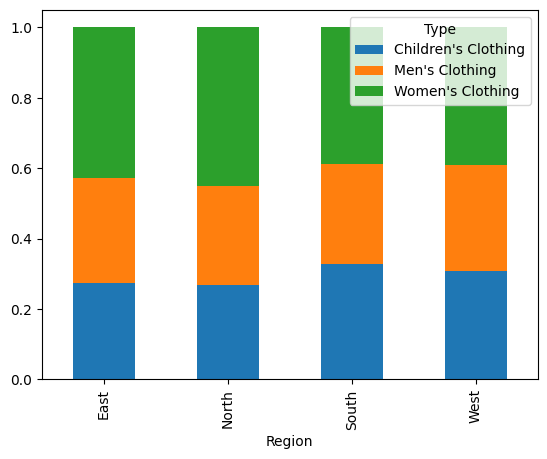

In [ ]:
pd.crosstab(index=clothing_sales.Region, columns=clothing_sales.Type, normalize="index").plot.bar(stacked=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## **$\color{green}{\textbf{TO DO 2:}}$**

### **You will use the url to this [ Tip Data Set](https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv) for this TODO.**

### **A. Data**
> **1.** Create a `pandas data frame` with the above url.

> **2.** Write a description of each column and its data type.

In [ ]:
tip_url = "https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv"
tip_df = pd.read_csv(tip_url)
tip_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **B. A contingency table Using Actual Values**


> **1a.**  Create a contingent table using ``crosstab: rows = day`` and ``columns = sex``**
By default, Pandas will generate a crosstab which counts the number of times each item appears (the length of that series).

> **1b.** Write a couple of sentences to verify that this table indeed satisfies the requirement of a contingency table.

In [ ]:
pd.crosstab(index=tip_df.day, columns=tip_df.sex)

sex,Female,Male
day,,
Fri,9,10
Sat,28,59
Sun,18,58
Thur,32,30


In [ ]:
tip_df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
tip_df.sex.unique()

array(['Female', 'Male'], dtype=object)

To verify that our crosstab represents all of the values, for example in the "day" column, we can use the `unique()` method to a unique list of values. When run (above), the output for the unique list of days is "Sun", "Sat", "Thur", "Fri", which indeed matches our crosstab table. We can run the same operation on the "sex" column, which shows us "Female", "Male", which again matches our crosstab.


> **2a.** Add Totals to the contingency table of the table (`Margins`) with the default title `"All"`

> **2b.** Write code to clarify sentences to conclude that the total row and column are correct (total count of data points should equal the total number of columns.)

In [ ]:
pd.crosstab(index=tip_df.day, columns=tip_df.sex, margins=True)

sex,Female,Male,All
day,,,
Fri,9,10,19
Sat,28,59,87
Sun,18,58,76
Thur,32,30,62
All,87,157,244


In [ ]:
# We can see from the output of `tip_df.info()` that the total number of rows matches the total in our crosstab above.
tip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


#### Verify that the number of rows in the data is equal to the grand total in the contingency table (value in the bottom right corner).

> **3.** Change the title `All` to `Total`

In [ ]:
pd.crosstab(index=tip_df.day, columns=tip_df.sex, margins=True, margins_name="Total")

sex,Female,Male,Total
day,,,
Fri,9,10,19
Sat,28,59,87
Sun,18,58,76
Thur,32,30,62
Total,87,157,244


### **C. A contingency table Using relative frequencies insteat of total counts**

> **1a.**  Create a contingent table to include margin crosstab: `margins_name = "Total`, normalize = "all"` By default, when using the two attributes, Pandas will generate a crosstab which counts the number of times each item appears (the length of that series) and divide by the total of **all cells**.

> **1b.** Write code and a couple of sentences to show why this table indeed satisfies the requirement of a contingency table with relative frequency with the total of all relative frequencies of **1.0.**

In [ ]:
pd.crosstab(index=tip_df.day, columns=tip_df.sex, margins=True, margins_name="Total", normalize="all")

sex,Female,Male,Total
day,,,
Fri,0.036885,0.040984,0.077869
Sat,0.114754,0.241803,0.356557
Sun,0.073770,0.237705,0.311475
Thur,0.131148,0.122951,0.254098
Total,0.356557,0.643443,1.000000


We can see from our code above that all of the relative frequences total up to 1.0. We can verify each row or column individually, for example, totally all of the relative frequencies of the "Female" column indeed sums to 0.356557. Similarly for the "Thur" row, the two relative frequencies sum to 0.254098.

> **2a.**  Create a contingent table using ``crosstab: `normalize = "all"` By default, Pandas will generate a crosstab which counts the number of times each item appears (the length of that series) and divide by the total of **each row**.

> **2b.** Write code and a couple of sentences to show why this table satisfies the requirement of a contingency table with relative frequency with the total of **each row** being **1.0.**

In [ ]:
# I am assuming that this question is meant to use `normalize="index"` as it refers to the relative frequency of each row being 1.0
pd.crosstab(index=tip_df.day, columns=tip_df.sex, normalize="index")

sex,Female,Male
day,,
Fri,0.473684,0.526316
Sat,0.321839,0.678161
Sun,0.236842,0.763158
Thur,0.516129,0.483871


In [ ]:
# To show that our table satisfies the requirement of a contingency table with each row totaling 1.0, we can use `sum(axis=1)` and see that each row totals 1.0
cross_df = pd.crosstab(index=tip_df.day, columns=tip_df.sex, normalize="index")
cross_df.sum(axis=1)

,0
day,
Fri,1.0
Sat,1.0
Sun,1.0
Thur,1.0


### **D. Create a contingency table that displays the average (mean) `tip` for each sex/day combination**


In [ ]:
pd.crosstab(index=tip_df.day, columns=tip_df.sex, values=tip_df.tip, aggfunc="mean")

sex,Female,Male
day,,
Fri,2.781111,2.693000
Sat,2.801786,3.083898
Sun,3.367222,3.220345
Thur,2.575625,2.980333


### **E. Plot the contingency table to verify if the total of probability in a row = 1**

<Axes: xlabel='day'>

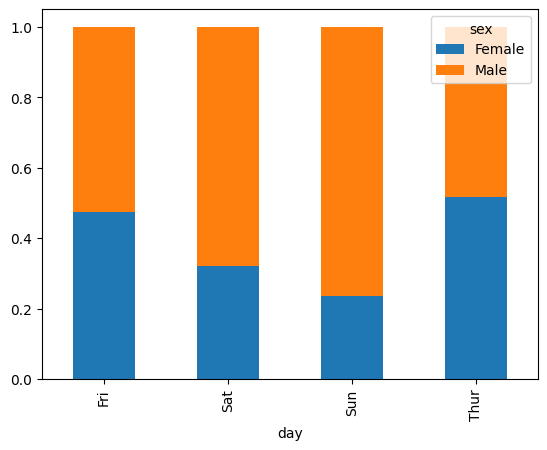

In [ ]:
pd.crosstab(index=tip_df.day, columns=tip_df.sex, normalize="index").plot.bar(stacked=True)